In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import scipy

In [77]:
ds = xr.open_dataset("moc_transports_200404_201893.nc")
time = ds['time'].values
amoc = ds['moc_mar_hc10'].values
df = pd.DataFrame(data={'time':time,'amoc':amoc})
df = df.set_index('time')
df_mon = df.resample('M').mean()

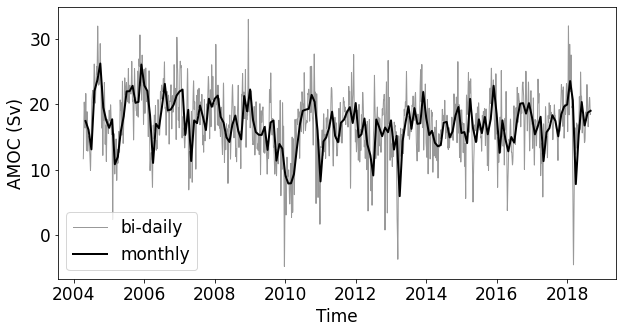

In [78]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 17})

plt.plot(df.index,df,alpha=0.8,linewidth=1,color='gray')
plt.plot(df_mon.index,df_mon,linewidth=2,color='k')
plt.xlabel('Time')
plt.ylabel('AMOC (Sv)')
plt.legend(['bi-daily','monthly'])

In [79]:
df_mon_norm = (df_mon-df_mon.mean())/df_mon.std()

Text(0, 0.5, 'AMOC (std)')

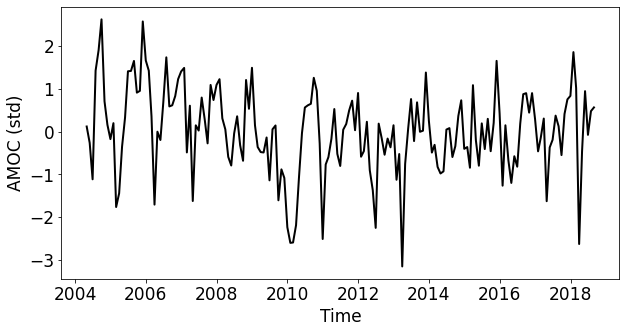

In [80]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 17})

plt.plot(df_mon_norm.index, df_mon_norm,linewidth=2,color='k')
plt.xlabel('Time')
plt.ylabel('AMOC (std)')

In [82]:
df_mon_norm.to_csv('RAPID_monthly_normalized_amoc.csv')